# Finding Heavy Traffic Indicators on I-94
We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.


# Introduction



In [1]:
# Importing essential libraries for data manipulation and visualization
import pandas as pd  # for data manipulation
import datetime as dt  # for handling date and time data
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns  # for enhanced visualization styles

# Data Loading



In [2]:
# Load the traffic volume dataset for I-94 Interstate highway
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')


#### Initial Data Inspection
To begin our analysis, let's take a quick look at the first few rows of the dataset to understand the structure of the data and the type of information included.


# Initial Data Exploration



In [3]:
i_94

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [4]:
# Displaying general information about the dataframe to inspect column data types and non-null values
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
%matplotlib inline

# Data Cleaning



<Axes: ylabel='Frequency'>

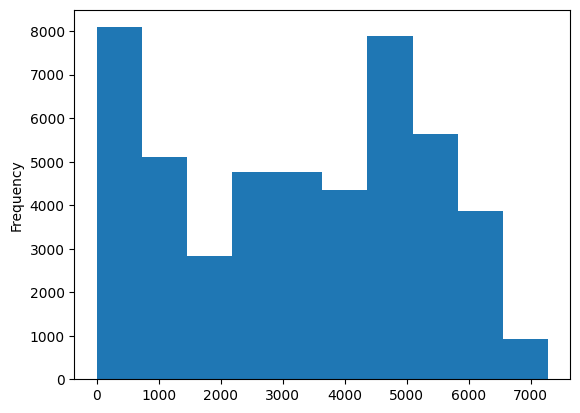

In [6]:
i_94['traffic_volume'].plot.hist()

In [7]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In most hours, the traffic volume is around 0-1000 and 5000-6000. Volume at 7000 is very rare, and trafic volume around 2000 is more unusual. About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

In [8]:
# Transform the date_time column to datetime by using the function pd.to_datetime()
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

# Data Analysis



In [9]:
daytime_mask = i_94['date_time'].dt.hour.between(7,19,inclusive='left')
nighttime_mask = ~i_94['date_time'].dt.hour.between(7,19,inclusive='left')

In [10]:
day = i_94.copy()[daytime_mask] #.copy() to make sure that we are not editing the original data frame i_94 when creating a new one. It is usually uncertain when it only concerns one variable.
night = i_94.copy()[nighttime_mask]

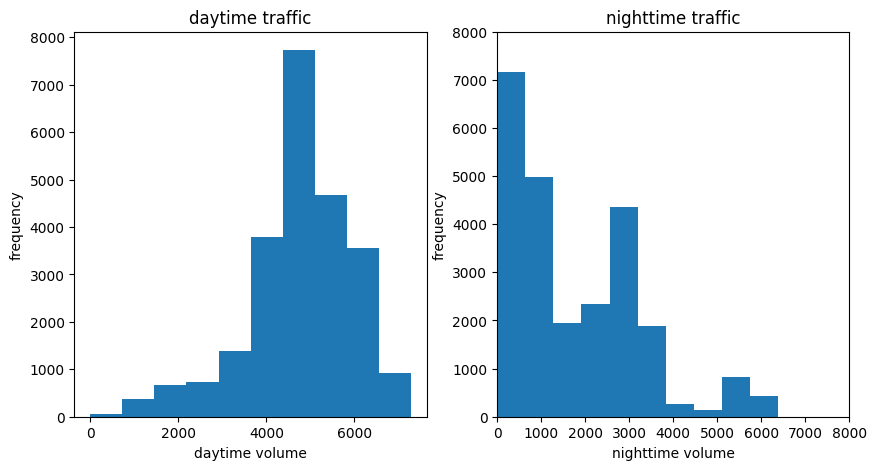

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('daytime traffic')
plt.hist(day['traffic_volume'])
plt.xlabel('daytime volume')
plt.ylabel('frequency')
plt.subplot(1,2,2)
plt.title('nighttime traffic')
plt.hist(night['traffic_volume'])
plt.xlabel('nighttime volume')
plt.ylabel('frequency')
plt.xlim(0,8000)
plt.ylim(0,8000)
plt.show()

In [12]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

# Data Visualization



In [13]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

_Analyze the results:
What shape do the histograms have and what does that indicate?
If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?_

Our goal is to find indicators of heavy traffic, so we decided to **only focus on the daytime data** moving forward.
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

Month
Day of the week
Time of day

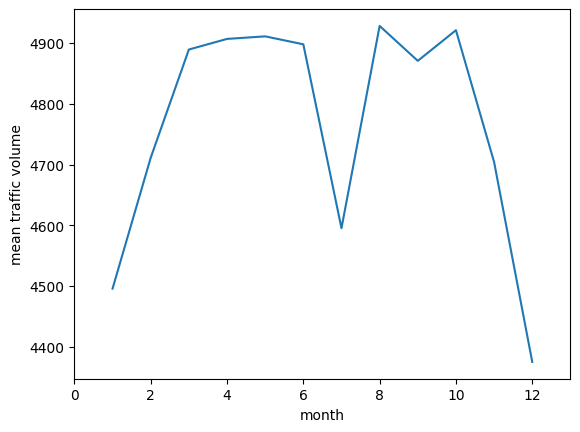

In [14]:
day['month'] = day['date_time'].dt.month
by_month_traffic_volume_mean = day.groupby('month')['traffic_volume'].mean()
plt.plot(by_month_traffic_volume_mean)
plt.xlabel('month')
plt.ylabel('mean traffic volume')
plt.xlim(0,13)
plt.show()

Traffic volume is specifically low in Jan, Jun and Dec. The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

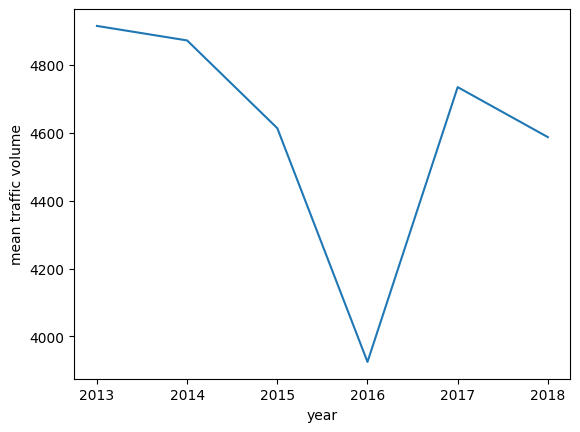

In [24]:
# what happened in July?
day['year'] = day['date_time'].dt.year
july_traffic_volume_mean = day[day['month'] == 7].groupby('year')['traffic_volume'].mean()
plt.plot(july_traffic_volume_mean)
plt.xlabel('year')b
plt.ylabel('mean traffic volume')
plt.show()

For the traffic volume in July, there was a huge drop in 2016.

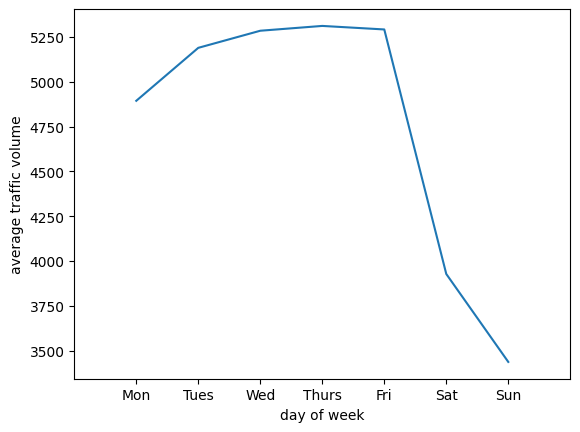

In [15]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek_traffic_volume_mean = day.groupby('dayofweek')['traffic_volume'].mean()
plt.plot(by_dayofweek_traffic_volume_mean)  # 0 is Monday, 6 is Sunday
plt.xlabel('day of week')
plt.ylabel('average traffic volume')
plt.xlim(-1,7)
plt.xticks(ticks = [0,1,2,3,4,5,6], labels=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.show()

On weekdays, the average traffic volume is above 5000, albeit a bit lower on Monday, while on weekends the traffic is much lighter, less than 4000.

In [17]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business_avg_traffic_volume = bussiness_days.groupby('hour')['traffic_volume'].mean()
by_hour_weekend_avg_traffic_volume = weekend.groupby('hour')['traffic_volume'].mean()

print(by_hour_business_avg_traffic_volume)
print(by_hour_weekend_avg_traffic_volume)

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


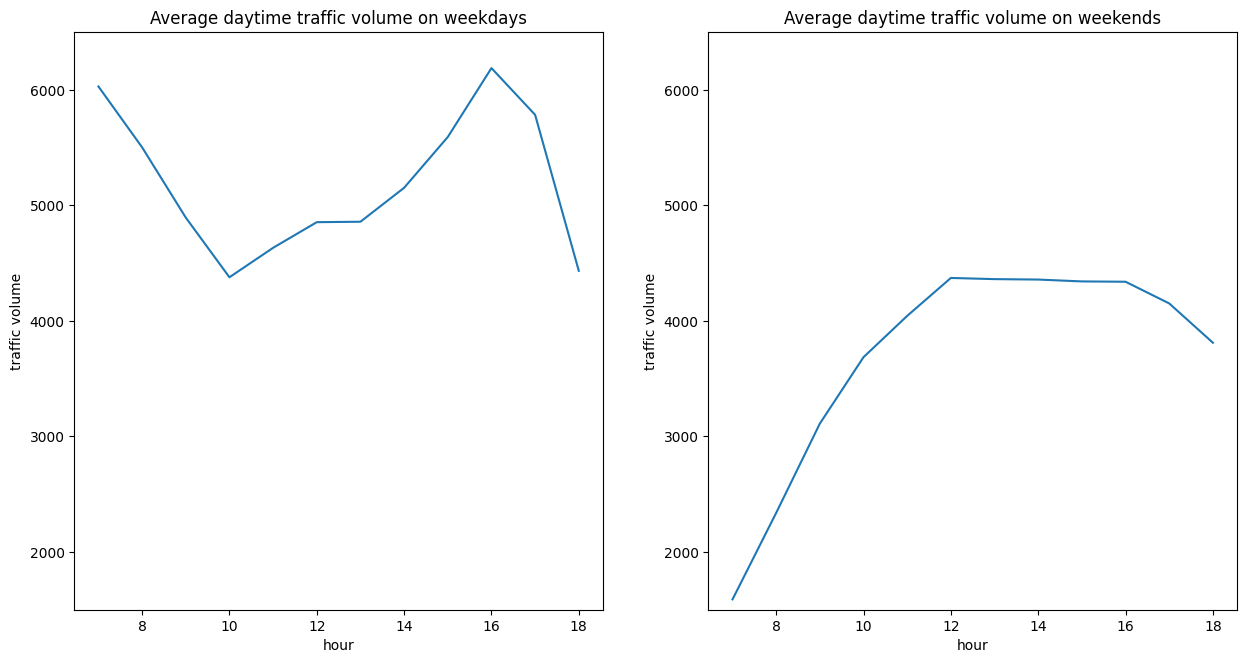

In [20]:
plt.figure(figsize = (15,7.5))
plt.subplot(1,2,1)
plt.plot(by_hour_business_avg_traffic_volume)
plt.title('Average daytime traffic volume on weekdays')
plt.ylim(1500,6500)
plt.xlabel('hour')
plt.ylabel('traffic volume')
plt.subplot(1,2,2)
plt.plot(by_hour_weekend_avg_traffic_volume)
plt.title('Average daytime traffic volume on weekends')
plt.xlabel('hour')
plt.ylabel('traffic volume')
plt.ylim(1500,6500)
plt.show()

Overall, the traffic volume on weekdays is constantly higher than that on weekends. On weekdays, the rush hours appear after 7 and the traffic peaks again at above 6000 around 4 in the afternoon. In contrast on weekends, the traffic volume rises in the morning and plateaus around 4200 in the afternoon before dropping again.

In [32]:
#temp,rain_1h, snow_1h, clouds_all 
day_numeric = day[['temp','rain_1h', 'snow_1h', 'clouds_all','traffic_volume']]
day_numeric.info()
day_numeric.corr()

<class 'pandas.core.frame.DataFrame'>
Index: 23877 entries, 0 to 48198
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            23877 non-null  float64
 1   rain_1h         23877 non-null  float64
 2   snow_1h         23877 non-null  float64
 3   clouds_all      23877 non-null  int64  
 4   traffic_volume  23877 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.1 MB


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000


Temperature has the strongest positive correlation with traffic volume, which means that the warmer the more traffic there is.

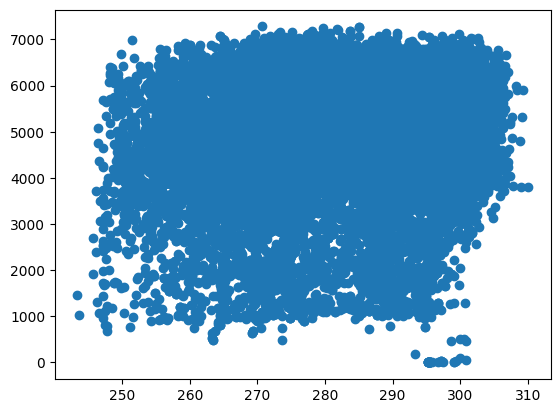

In [38]:
plt.scatter(day.loc[day['temp']>200,'temp'], day.loc[day['temp']>200,'traffic_volume'])
plt.show()

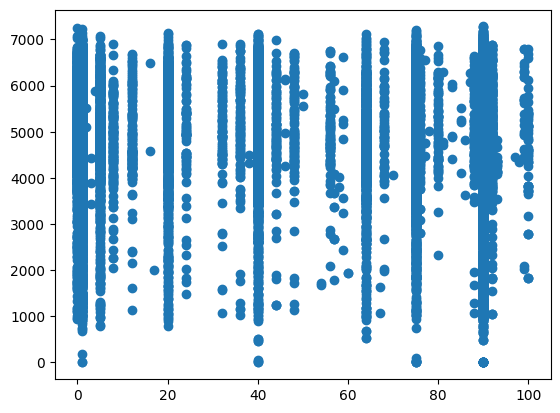

In [51]:
plt.scatter(day['clouds_all'],day['traffic_volume'])
plt.show()

we didn't find any reliable indicator of heavy traffic.

In [52]:
by_weather_main_traffic_volume = day.groupby('weather_main')['traffic_volume'].mean()
by_weather_description_traffic_volume = day.groupby('weather_description')['traffic_volume'].mean()

In [57]:
by_weather_main_traffic_volume

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64

<BarContainer object of 11 artists>

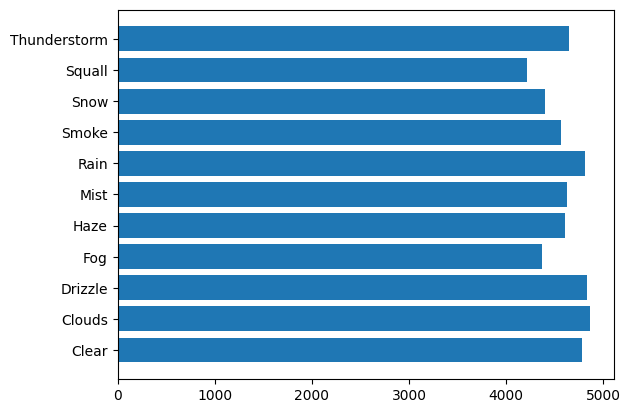

In [61]:
plt.barh(by_weather_main_traffic_volume.index,by_weather_main_traffic_volume)

Under no weather condition is traffic volume exceeding 5000, but it tends to be heavier traffic when The weather is mild, such as where the sky is clear there are only clouds or drizzle

<Axes: ylabel='weather_description'>

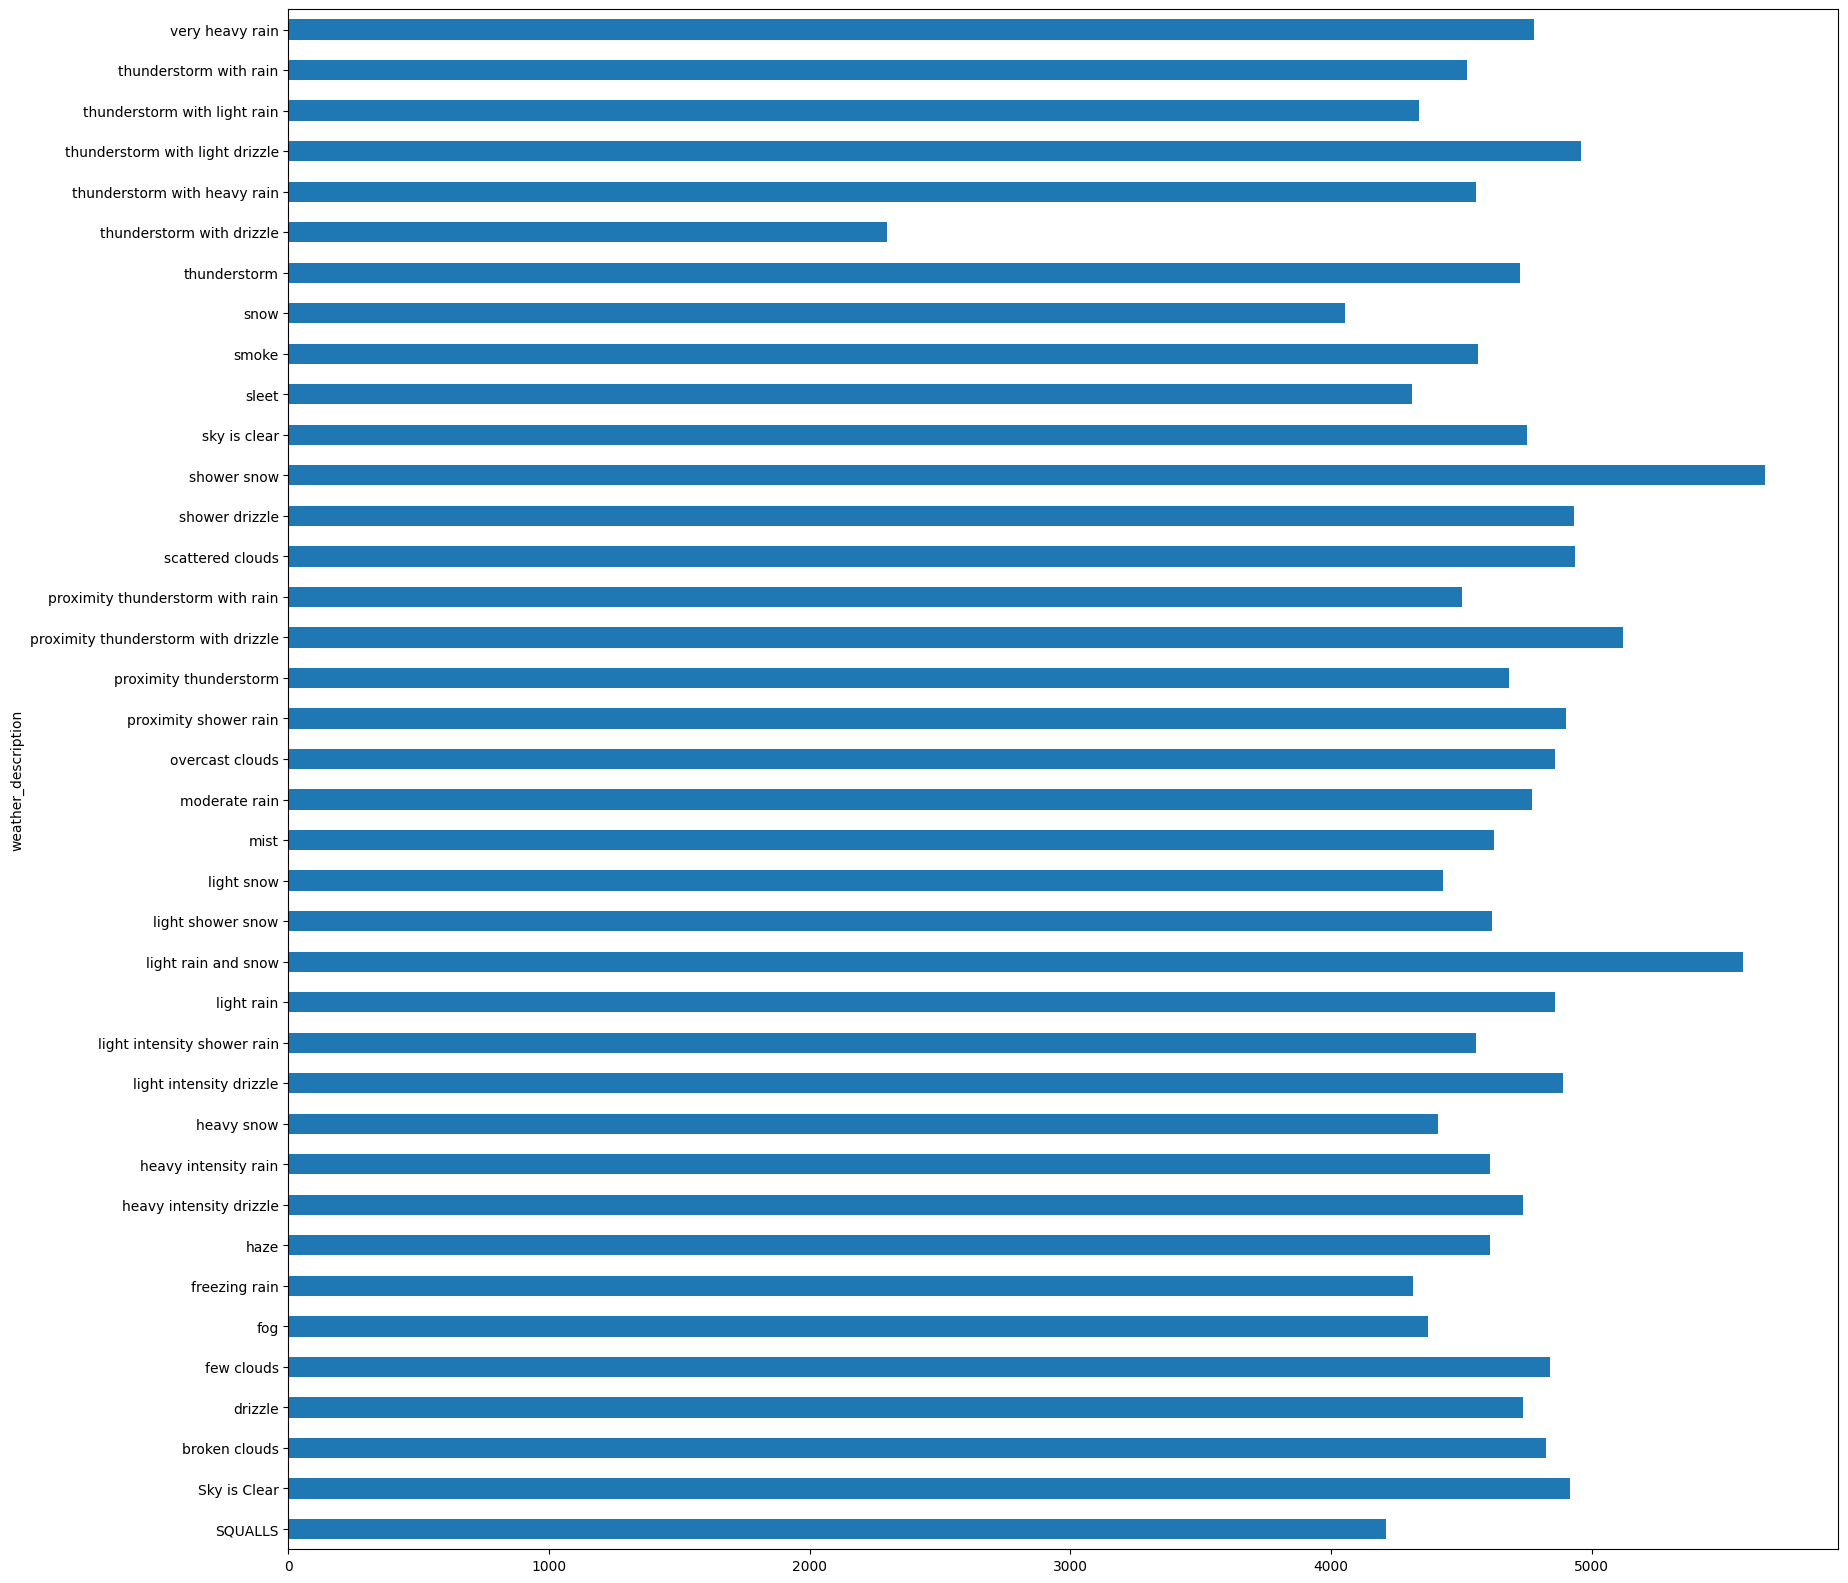

In [65]:
plt.figure(figsize=(20,20))
by_weather_description_traffic_volume.plot.barh()

The traffic volume exceeds 5000 when there is light rain and snow and shower snow, which means that people might perceive the weather condition to be good enough to go out, but it actually causes trouble on the road